In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('df2.csv') 
data.rename(columns = {'yj13.2':'ЗП',
                     'yj72.18a':'Образование',
                     'yj6.2':'РабочаяНеделя',
                     'yj10.2':'Премия',
                     'yj21b':'Отпуск',
                     'yj1.1.1': 'Удовлетворенность'}, 
                     inplace = True)
data

,Отпуск,РабочаяНеделя,Премия,ЗП,Удовлетворенность,Образование
0,42.0,40.0,1209.490560,25000.0,3.0,2.0
1,33.0,60.0,2087.977101,18000.0,4.0,2.0
2,28.0,48.0,3590.097017,30000.0,4.0,1.0
3,28.0,40.0,1645.214170,38000.0,1.0,3.0
4,28.0,40.0,2365.683135,40000.0,1.0,3.0
...,...,...,...,...,...,...
3397,28.0,48.0,5219.941393,30000.0,2.0,2.0
3398,24.0,60.0,5851.406927,35000.0,3.0,1.0
3399,14.0,40.0,2099.879856,20000.0,3.0,2.0
3400,28.0,40.0,11022.006037,53000.0,2.0,2.0


In [3]:
def generate_polynomial_features(data, degree=2):
    """
    Генерация полиномиальных признаков.
    
    Args:
        data (pd.DataFrame): Исходные данные.
        degree (int): Степень полинома.
        
    Returns:
        pd.DataFrame: Данные с добавленными полиномиальными признаками.
    """
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(data)
    feature_names = poly.get_feature_names_out(data.columns)
    return pd.DataFrame(poly_features, columns=feature_names)

In [4]:
# Масштабирование данных (полиномиальные признаки чувствительны к масштабу)
X = data.loc[:, ['Отпуск', 'РабочаяНеделя', 'Премия', 'ЗП', 'Образование']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
data_scaled = pd.concat([X_scaled, data['Удовлетворенность']], axis=1)

# Добавление полиномиальных признаков 
data_polynom = generate_polynomial_features(data_scaled.loc[:, ['Отпуск', 'РабочаяНеделя', 'Премия', 'ЗП', 'Образование']], degree=3)
data_polynom

,Отпуск,РабочаяНеделя,Премия,ЗП,Образование,Отпуск^2,Отпуск РабочаяНеделя,Отпуск Премия,Отпуск ЗП,Отпуск Образование,...,Премия^3,Премия^2 ЗП,Премия^2 Образование,Премия ЗП^2,Премия ЗП Образование,Премия Образование^2,ЗП^3,ЗП^2 Образование,ЗП Образование^2,Образование^3
0,1.717424,-0.402246,-1.125067,-0.143033,-0.308984,2.949545,-0.690827,-1.932216,-0.245648,-0.530656,...,-1.424081,-0.181048,-0.391104,-0.023017,-0.049722,-0.107411,-0.002926,-0.006321,-0.013656,-0.029499
1,0.628614,2.854786,-0.917530,-0.701907,-0.308984,0.395155,1.794558,-0.576772,-0.441228,-0.194232,...,-0.772432,-0.590907,-0.260121,-0.452042,-0.198992,-0.087598,-0.345810,-0.152228,-0.067012,-0.029499
2,0.023719,0.900566,-0.562663,0.256163,-1.845772,0.000563,0.021361,-0.013346,0.006076,-0.043780,...,-0.178133,0.081098,-0.584352,-0.036922,0.266037,-1.916923,0.016809,-0.121118,0.872714,-6.288318
3,0.023719,-0.402246,-1.022130,0.894875,1.227805,0.000563,-0.009541,-0.024244,0.021226,0.029123,...,-1.067869,0.934920,1.282747,-0.818523,-1.123046,-1.540865,0.716618,0.983228,1.349028,1.850921
4,0.023719,-0.402246,-0.851923,1.054554,1.227805,0.000563,-0.009541,-0.020207,0.025013,0.029123,...,-0.618303,0.765367,0.891108,-0.947409,-1.103058,-1.284278,1.172751,1.365421,1.589744,1.850921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,0.023719,0.900566,-0.177622,0.256163,-0.308984,0.000563,0.021361,-0.004213,0.006076,-0.007329,...,-0.005604,0.008082,-0.009748,-0.011655,0.014059,-0.016958,0.016809,-0.020275,0.024456,-0.029499
3398,-0.460196,2.854786,-0.028442,0.655358,-1.845772,0.211781,-1.313762,0.013089,-0.301593,0.849418,...,-0.000023,0.000530,-0.001493,-0.012216,0.034405,-0.096899,0.281472,-0.792748,2.232723,-6.288318
3399,-1.669985,-0.402246,-0.914718,-0.542228,-0.308984,2.788851,0.671745,1.527565,0.905514,0.515999,...,-0.765352,-0.453687,-0.258529,-0.268938,-0.153252,-0.087329,-0.159422,-0.090845,-0.051767,-0.029499
3400,0.023719,-0.402246,1.193080,2.092462,-0.308984,0.000563,-0.009541,0.028299,0.049632,-0.007329,...,1.698278,2.978494,-0.439820,5.223778,-0.771371,0.113905,9.161627,-1.352854,0.199770,-0.029499


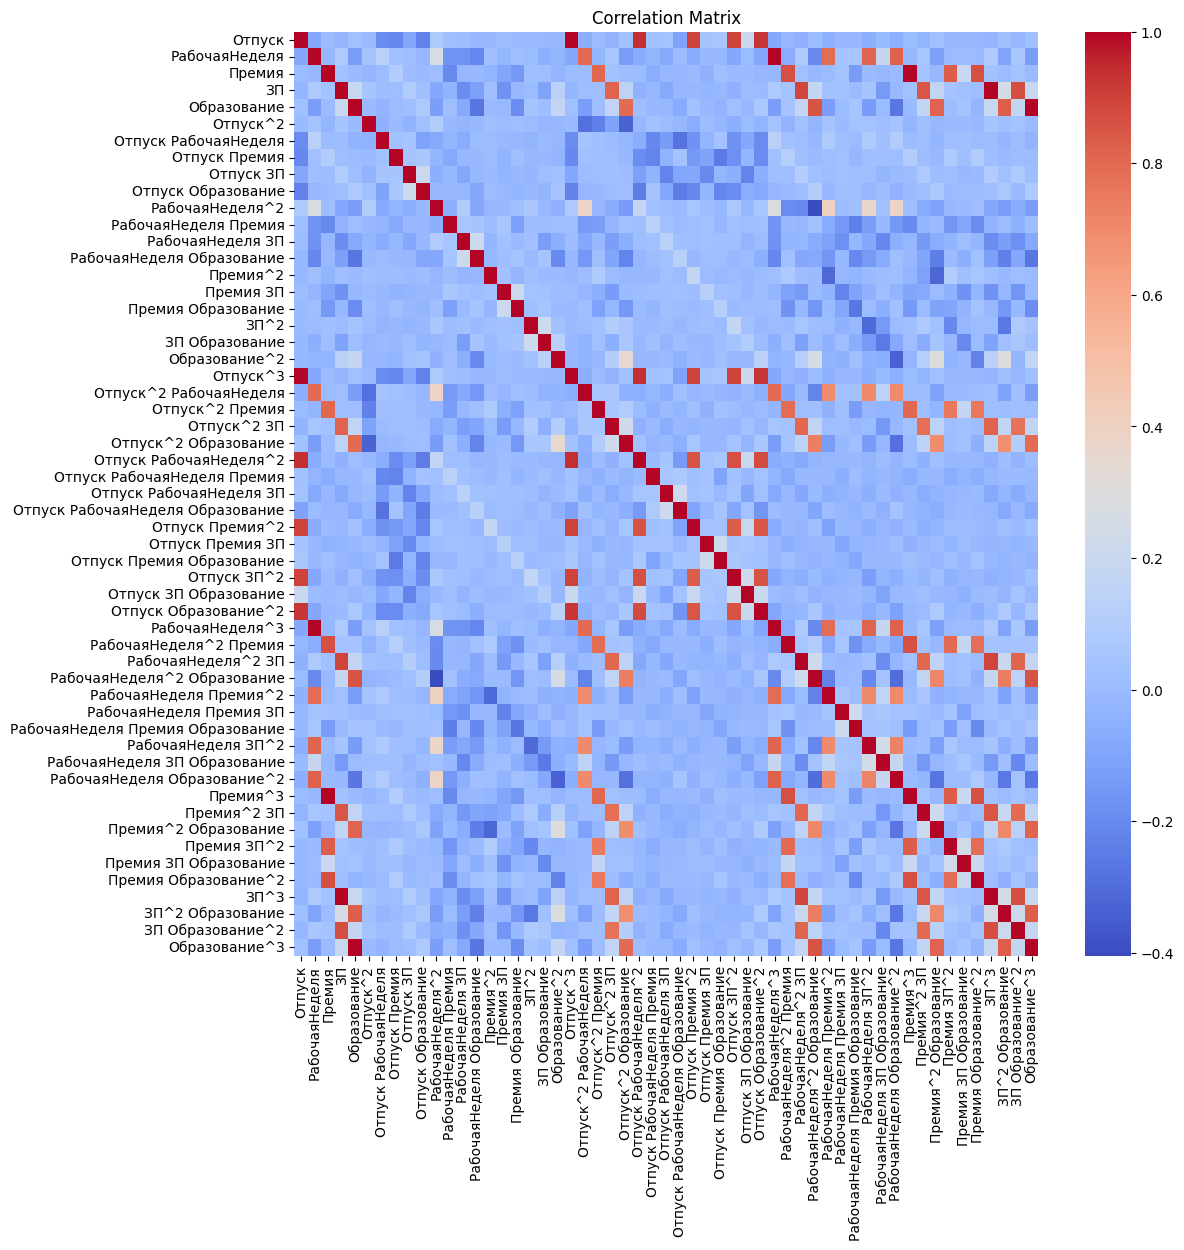

In [5]:
# Построение матрицы корреляции
# Используется коэффициент корреляции Спирмена, так как данные имеют нелинейную свзяь 
correlation_matrix = data_polynom.corr(method='spearman')

# Вывод матрицы
# print(correlation_matrix)

# Визуализация матрицы корреляции с помощью heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", xticklabels=True)
plt.title("Correlation Matrix")
plt.show()

In [6]:
def bin_and_discretize_feature(data, columns, bins):
    """
    Преобразование непрерывного признака в категориальный.
    
    Args:
        data (pd.DataFrame): Исходные данные.
        column (str): Имена признаков для биннинга.
        bins (int): Количество бинов для каждого признака.        
    Returns:
        pd.DataFrame: Данные с добавленным категориальным признаком.
    """
    data = data.copy()
    for column, bin in zip(columns, bins):
        data[f"{column}_binned"] = pd.cut(data[column], bins=bin, labels=[i+1 for i in range(bin)])
    return data

In [7]:
data_binned = bin_and_discretize_feature(data, ['ЗП', 'Премия', 'Отпуск'], [5, 5, 5])
data_binned

,Отпуск,РабочаяНеделя,Премия,ЗП,Удовлетворенность,Образование,ЗП_binned,Премия_binned,Отпуск_binned
0,42.0,40.0,1209.490560,25000.0,3.0,2.0,2,1,4
1,33.0,60.0,2087.977101,18000.0,4.0,2.0,2,1,3
2,28.0,48.0,3590.097017,30000.0,4.0,1.0,3,1,3
3,28.0,40.0,1645.214170,38000.0,1.0,3.0,3,1,3
4,28.0,40.0,2365.683135,40000.0,1.0,3.0,3,1,3
...,...,...,...,...,...,...,...,...,...
3397,28.0,48.0,5219.941393,30000.0,2.0,2.0,3,2,3
3398,24.0,60.0,5851.406927,35000.0,3.0,1.0,3,2,2
3399,14.0,40.0,2099.879856,20000.0,3.0,2.0,2,1,1
3400,28.0,40.0,11022.006037,53000.0,2.0,2.0,4,3,3


In [8]:
def perform_rfe(data, target, n_features_to_select):
    """
    Рекурсивное исключение признаков.
    
    Args:
        data (pd.DataFrame): Данные с признаками.
        target (pd.Series): Целевая переменная.
        n_features_to_select (int): Количество признаков для выбора.
        
    Returns:
        list: Отобранные признаки.
    """
    model = RandomForestClassifier(random_state=42) # Нужно вставить нашу модель!! Она должна иметь либо абсолютные значения весов (coef_) или значения важности (feature_importances_)
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
    rfe.fit(data, target)
    return data.columns[rfe.support_].tolist()

In [9]:
data_polynom.columns = [col.replace(' ', '').replace('\n', '') for col in data_polynom.columns]

columns = perform_rfe(data_polynom, data['Удовлетворенность'], 5)
print(columns)
data_rfe = pd.DataFrame()
for column in columns:
    data_rfe[column] = data_polynom[column]

data_rfe

['ОтпускПремияЗП', 'ОтпускПремияОбразование', 'РабочаяНеделяПремия^2', 'Премия^2ЗП', 'ПремияЗП^2']


,ОтпускПремияЗП,ОтпускПремияОбразование,РабочаяНеделяПремия^2,Премия^2ЗП,ПремияЗП^2
0,0.276371,0.597024,-0.509153,-0.181048,-0.023017
1,0.404840,0.178213,2.403331,-0.590907,-0.452042
2,-0.003419,0.024634,0.285110,0.081098,-0.036922
3,-0.021695,-0.029767,-0.420246,0.934920,-0.818523
4,-0.021309,-0.024810,-0.291940,0.765367,-0.947409
...,...,...,...,...,...
3397,-0.001079,0.001302,0.028413,0.008082,-0.011655
3398,0.008578,-0.024159,0.002309,0.000530,-0.012216
3399,-0.828289,-0.471993,-0.336563,-0.453687,-0.268938
3400,0.059215,-0.008744,-0.572574,2.978494,5.223778


In [62]:
def perform_lasso_selection(data, target, alpha):
    """
    Отбор признаков с использованием регуляризации Lasso.
    
    Args:
        data (pd.DataFrame): Данные с признаками.
        target (pd.Series): Целевая переменная.
        alpha (float): Коэффициент регуляризации.
        
    Returns:
        list: Отобранные признаки.
    """
    lasso = Lasso(alpha=alpha, random_state=42)
    lasso.fit(data, target)
    model = SelectFromModel(lasso, prefit=True)
    return data.columns[model.get_support()].tolist()

In [73]:
columns = perform_lasso_selection(data_polynom, data['Удовлетворенность'], alpha=0.07)
data_lasso = pd.DataFrame()
for column in columns:
    data_lasso[column] = data_polynom[column]

data_lasso

,РабочаяНеделя^3,РабочаяНеделя^2ЗП,Премия^3,Премия^2ЗП,ЗП^3,Образование^3
0,-0.065084,-0.023143,-1.424081,-0.181048,-0.002926,-0.029499
1,23.265933,-5.720399,-0.772432,-0.590907,-0.345810,-0.029499
2,0.730377,0.207753,-0.178133,0.081098,0.016809,-6.288318
3,-0.065084,0.144793,-1.067869,0.934920,0.716618,1.850921
4,-0.065084,0.170629,-0.618303,0.765367,1.172751,1.850921
...,...,...,...,...,...,...
3397,0.730377,0.207753,-0.005604,0.008082,0.016809,-0.029499
3398,23.265933,5.341037,-0.000023,0.000530,0.281472,-6.288318
3399,-0.065084,-0.087734,-0.765352,-0.453687,-0.159422,-0.029499
3400,-0.065084,0.338565,1.698278,2.978494,9.161627,-0.029499
